In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load Sample Dataset

In [3]:
df=pd.read_excel('/Users/sanskarnamdeo/Desktop/Brainwave Intern/Sample - Superstore.xlsx',sheet_name ='Orders')

In [4]:
df.head()

,A`,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4962,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,98103.0,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801
1,4963,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,98103.0,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644
2,4964,CA-2016-156587,2016-03-07,2016-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,98103.0,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588
3,8223,CA-2016-152905,2016-02-18,2016-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,...,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248
4,8802,CA-2018-140935,2018-11-10,2018-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,73120.0,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544


## Information about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   A`              9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [7]:
df.describe()

,A`,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


### Total Sales,Category Wise Sale and Region Wise sale 

In [9]:
TotalSales = df['Sales'].sum()
print("Total Sale = ", TotalSales)

Total Sale =  2297200.8603


In [81]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index().sort_values('Sales')

In [83]:
category_sales

,Category,Sales
1,Office Supplies,719047.0320
0,Furniture,741999.7953
2,Technology,836154.0330


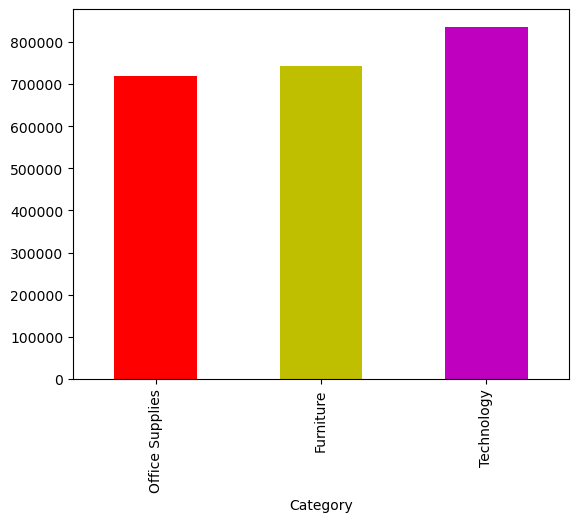

In [119]:
bar_color=['r','y','m']
category_sales.plot(x='Category', y='Sales', kind='bar',color=bar_color,legend=False)
plt.show()

In [75]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values('Sales')

In [77]:
region_sales

,Region,Sales
2,South,391721.9050
0,Central,501239.8908
1,East,678781.2400
3,West,725457.8245


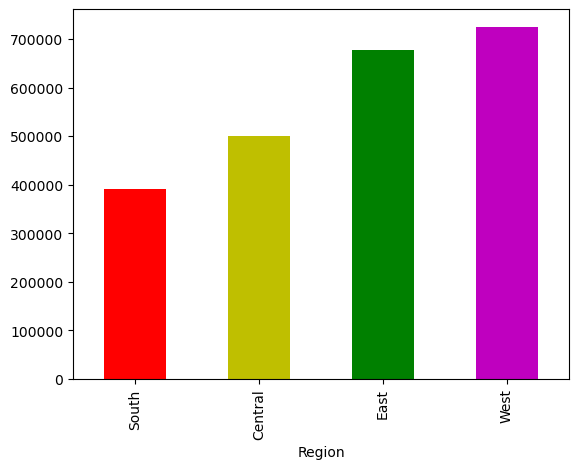

In [123]:
bar_color=['r','y','g','m']
region_sales.plot(x='Region',y='Sales',kind='bar',color=bar_color,legend=False)
plt.show()

## Total profit and segment wise profit 

In [37]:
TotalProfit=df['Profit'].sum()
print("Total Profit Is ",round(TotalProfit,2))

Total Profit Is  286397.02


In [45]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

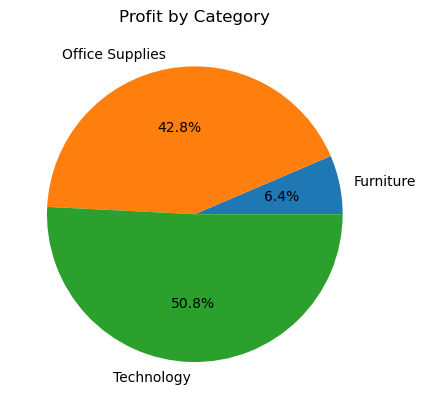

In [127]:
category_profit.plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Profit by Category')
plt.show()

## Total orders and Average Order Value(AOV)

In [17]:
TotalOrders = df["Order ID"].count()
print("Total Orders = ", TotalOrders)

Total Orders =  9994


In [18]:
AOV = (TotalSales/TotalOrders)
print("Average Order Value(AOV) is",round(AOV,2))

Average Order Value(AOV) is 229.86


## Top Selling Product

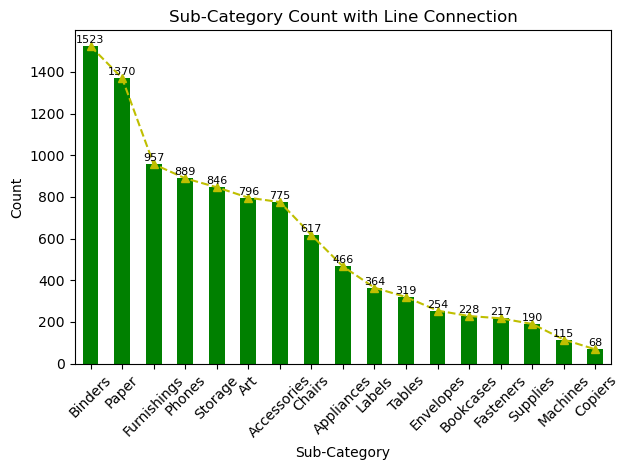

In [105]:
import matplotlib.pyplot as plt

# Get value counts
subcat_counts = df["Sub-Category"].value_counts()

# Bar chart
ax = subcat_counts.plot(kind='bar', color='g')


x_pos = [bar.get_x() + bar.get_width()/2 for bar in ax.patches]
y_pos = [bar.get_height() for bar in ax.patches]


plt.plot(x_pos, y_pos, color='y', linestyle='--', marker='^')


for x, y in zip(x_pos, y_pos):
    plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=8)

# Show plot
plt.title("Sub-Category Count with Line Connection")
plt.ylabel("Count")
plt.xlabel("Sub-Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 3 Customers

In [61]:
df['Customer Name'].value_counts().head()

Customer Name
William Brown    37
Matt Abelman     34
John Lee         34
Paul Prost       34
Edward Hooks     32
Name: count, dtype: int64

<Axes: xlabel='Customer Name'>

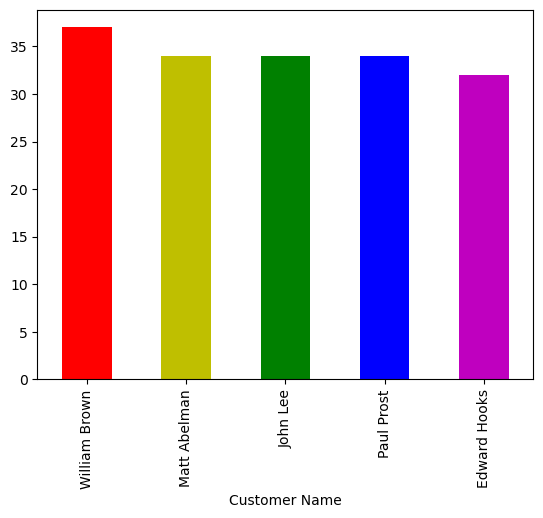

In [107]:
bar_color=['r','y','g','b','m']
df['Customer Name'].value_counts().head().sort_values(ascending=False).plot(kind='bar',color=bar_color)

## Most Used Ship Mode and Its efficiency

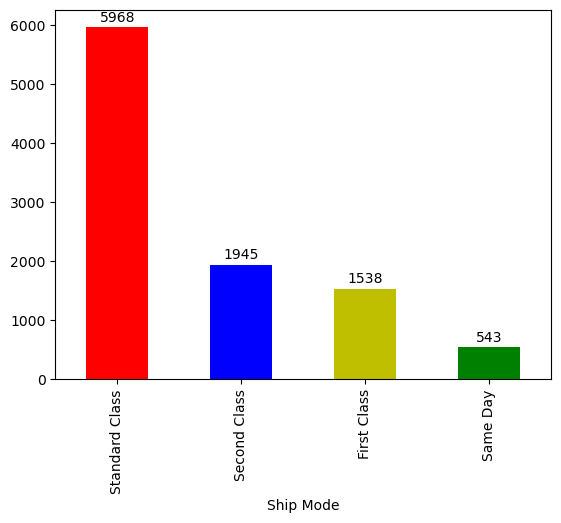

In [160]:
# Get value counts
ship_mode_counts = df['Ship Mode'].value_counts()

# Custom bar colors
bar_color = ['r', 'b', 'y', 'g']

# Plot bar chart
ax = ship_mode_counts.plot(kind='bar', color=bar_color)

# x and y values
x = range(len(ship_mode_counts))
y = ship_mode_counts.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+100,y[i],ha='center',color='black',fontsize=10)
addlabels(x,y)

# Time Series Analysis

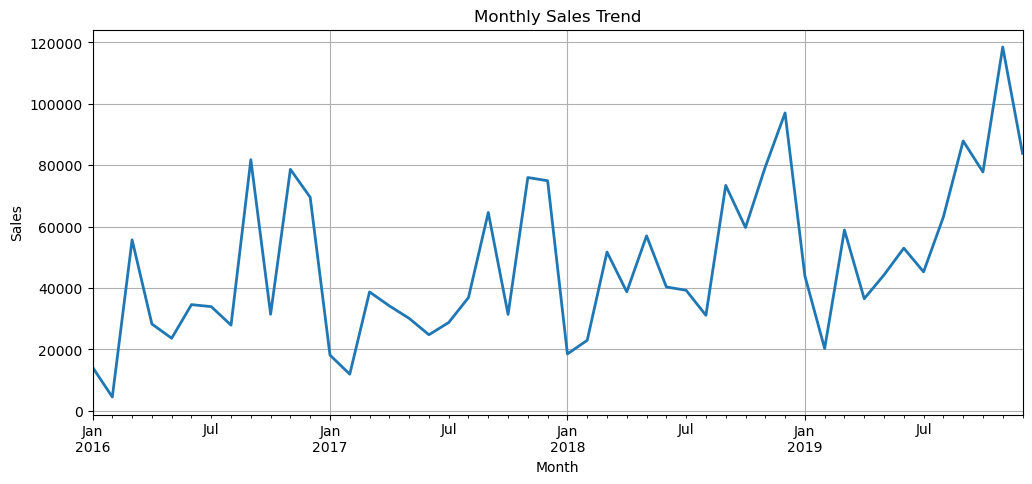

In [171]:
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df['Quarter'] = df['Order Date'].dt.to_period('Q').dt.to_timestamp()
df['Order_to_Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Grouped summaries
monthly = df.groupby('Month')[['Sales', 'Profit']].sum()
quarterly = df.groupby('Quarter')[['Sales', 'Profit']].sum()
daily_shipping_delay = df.groupby('Order Date')['Order_to_Ship_Days'].mean()


monthly['Sales'].plot(title='Monthly Sales Trend', figsize=(12,5), linewidth=2)
plt.ylabel("Sales")
plt.grid(True)
plt.show()

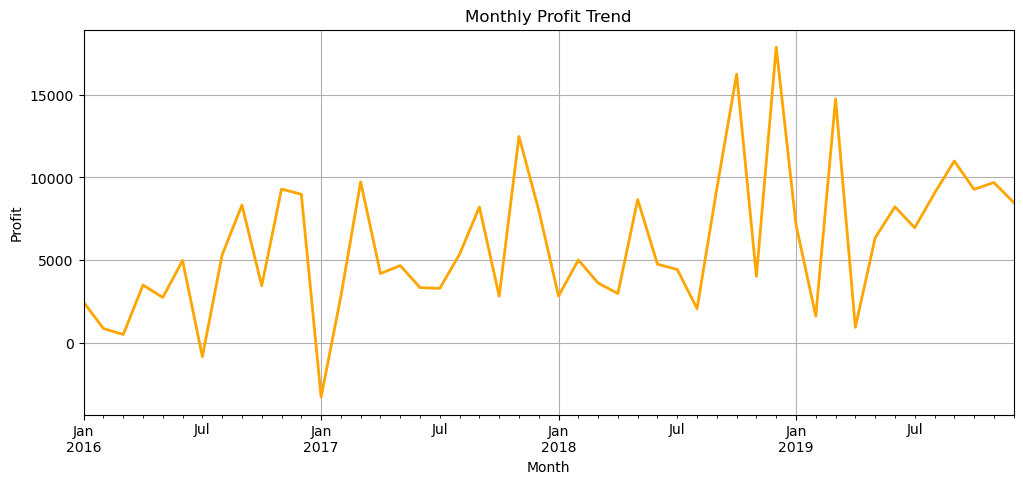

In [164]:
# 2. Monthly Profit Line Chart
monthly['Profit'].plot(title='Monthly Profit Trend', figsize=(12,5), color='orange', linewidth=2)
plt.ylabel("Profit")
plt.grid(True)
plt.show()

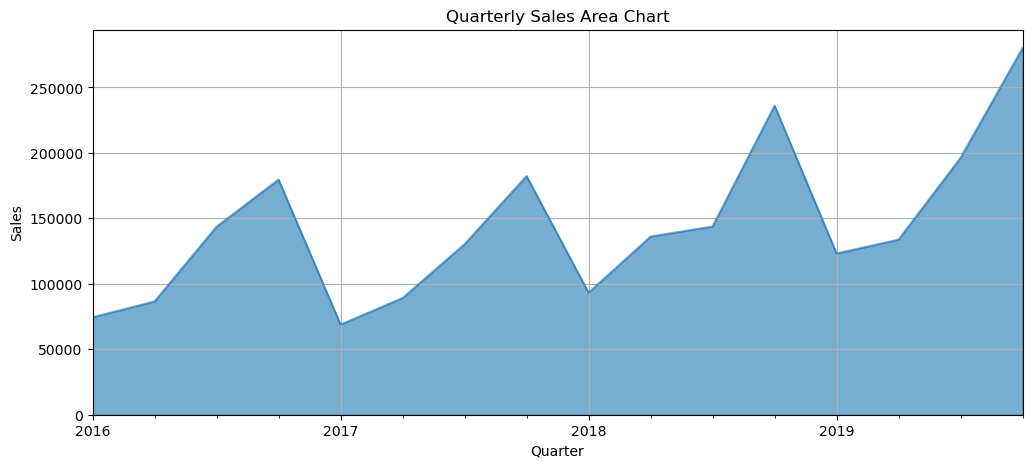

In [166]:
# 3. Quarterly Sales Area Chart
quarterly['Sales'].plot(kind='area', title='Quarterly Sales Area Chart', figsize=(12,5), alpha=0.6)
plt.ylabel("Sales")
plt.grid(True)
plt.show()

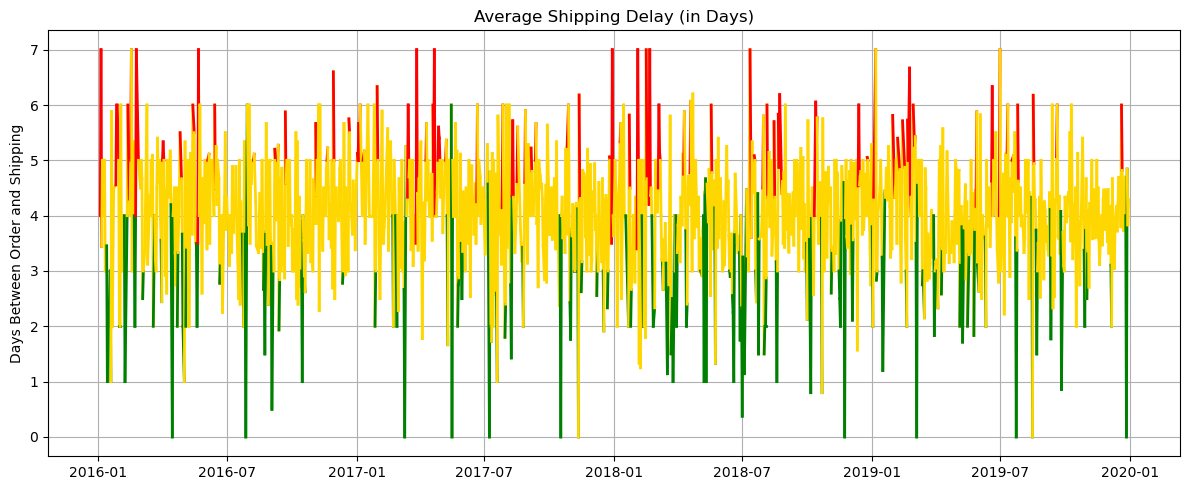

In [175]:
# Get daily average shipping delay
daily_delay = df.groupby('Order Date')['Order_to_Ship_Days'].mean()

# Define thresholds
low_thresh = 3
high_thresh = 5

# Plot with segmented colors
plt.figure(figsize=(12, 5))
for i in range(len(daily_delay) - 1):
    x = [daily_delay.index[i], daily_delay.index[i+1]]
    y = [daily_delay.iloc[i], daily_delay.iloc[i+1]]

    # Color based on average of segment
    avg = sum(y) / 2
    if avg <= low_thresh:
        color = 'green'
    elif avg <= high_thresh:
        color = 'gold'
    else:
        color = 'red'

    plt.plot(x, y, color=color, linewidth=2)

plt.title('Average Shipping Delay (in Days)')
plt.ylabel('Days Between Order and Shipping')
plt.grid(True)
plt.tight_layout()
plt.show()


# Predictive Analysis

### Monthly Sales Forecast (Next 12 Months)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


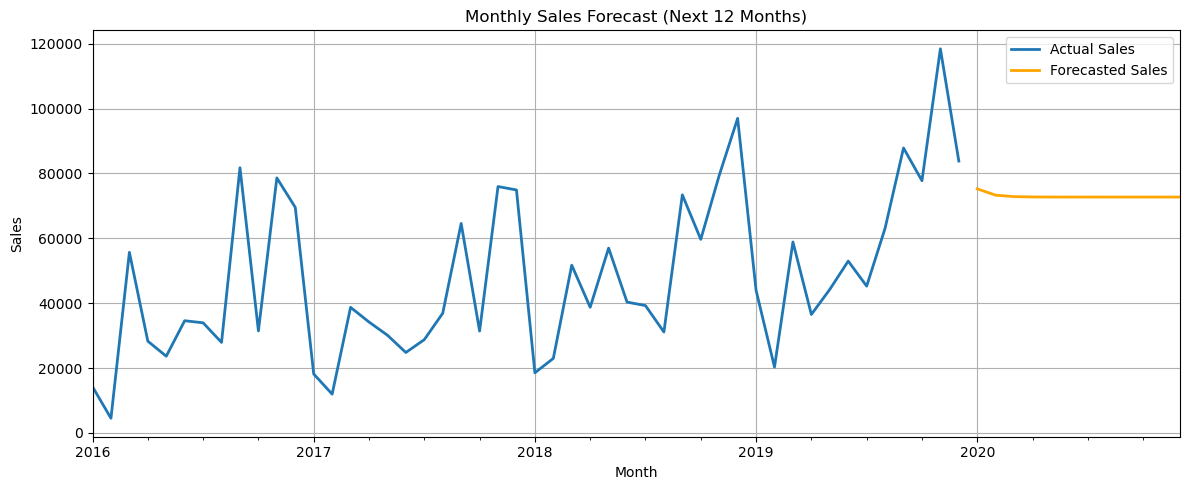

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_excel("Sample - Superstore.xlsx", sheet_name="Orders")

# Convert order date and aggregate by month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = df.groupby('Month')['Sales'].sum()

# Fit ARIMA model (simplified)
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for next 12 months
forecast = model_fit.forecast(steps=12)

# Create forecast index
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast.index = forecast_index

# Plot the result
plt.figure(figsize=(12, 5))
monthly_sales.plot(label='Actual Sales', linewidth=2)
forecast.plot(label='Forecasted Sales', color='orange', linewidth=2)
plt.title("Monthly Sales Forecast (Next 12 Months)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### profit or loss likelihood per order

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_excel("Sample - Superstore.xlsx", sheet_name="Orders")

# Create binary target: 1 for profit, 0 for loss or break-even
df['Profit_Label'] = (df['Profit'] > 0).astype(int)

# Select features
features = [
    'Sales', 'Discount', 'Quantity',
    'Category', 'Sub-Category', 'Region', 'Ship Mode'
]
X = df[features]
y = df['Profit_Label']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Category', 'Sub-Category', 'Region', 'Ship Mode'], drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


df['Profit_Probability'] = clf.predict_proba(X_encoded)[:, 1]
df['Profit_Prediction'] = (df['Profit_Probability'] > 0.5).astype(int)

print(df[['Order ID', 'Sales', 'Profit', 'Profit_Probability', 'Profit_Prediction']])


            Order ID    Sales    Profit  Profit_Probability  Profit_Prediction
0     CA-2016-156587   48.712    5.4801                0.91                  1
1     CA-2016-156587   17.940    4.6644                1.00                  1
2     CA-2016-156587  242.940    4.8588                1.00                  1
3     CA-2016-152905   12.624   -2.5248                0.23                  0
4     CA-2018-140935  221.980   62.1544                1.00                  1
...              ...      ...       ...                 ...                ...
9989  CA-2018-152471  823.960   51.4975                1.00                  1
9990  CA-2018-152471   15.984    4.9950                1.00                  1
9991  CA-2018-167682   71.120   22.0472                1.00                  1
9992  CA-2018-167682  259.960  124.7808                1.00                  1
9993  CA-2019-141481   61.440   16.5888                1.00                  1

[9994 rows x 5 columns]


In [185]:
df['Profit_Prediction'].value_counts()

Profit_Prediction
1    8083
0    1911
Name: count, dtype: int64